# Exploratory data analysis

Histogram can be a useful plot generating when exploring a data set.
For example, we are interested in the fraction of the vote that went to Barack Obama in each county. We can plot this as a histogram using the **matplotlib.pyplot** module's hist function.
We pass it the dem_share column of the DataFrame.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# set seaborn style
sns.set()

In [2]:
# Dataset
dataset = pd.read_csv('../Datasets/2008_all_states.csv')

# Preview
print(dataset.head())

  state                                       county  total_votes  dem_votes  \
0    AK    State House District 8, Denali-University        10320       4995   
1    AK  State House District 37, Bristol Bay-Aleuti         4665       1868   
2    AK  State House District 12, Richardson-Glenn H         7589       1914   
3    AK      State House District 13, Greater Palmer        11526       2800   
4    AK     State House District 14, Greater Wasilla        10456       2132   

   rep_votes  other_votes  dem_share east_west  
0       4983          342      50.06      west  
1       2661          136      41.24      west  
2       5467          208      25.93      west  
3       8432          294      24.93      west  
4       8108          216      20.82      west  


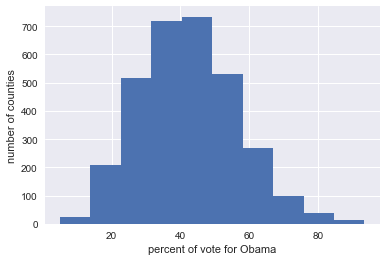

In [3]:
# Generating a histogram
plt.hist(dataset['dem_share'])

# label the axes
plt.xlabel('percent of vote for Obama')
plt.ylabel('number of counties')

# Show the plot
plt.show()

Different binning generate differents plots.
We can specified the edges of the bars of the histogram are, the bin edges, and use the bins keyword argument to pass that to *plt.hist*

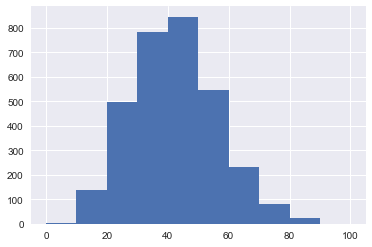

In [4]:
# define the bins
bin_edges = [bins for bins in range(0,101, 10)]

# histogram
plt.hist(dataset['dem_share'], bins=bin_edges)

plt.show()

The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.

In [5]:
def n_bins(data):
    """
    Function that computed the number of bins of a set
    """
    
    # Compute number of data points
    n_data = len(data)
    
    # Number of bins is the square root
    n_bins = np.sqrt(n_data)
    
    # Convert number of bins to integer
    n_bins = int(n_bins)
    
    return n_bins

## Plotting all of your data: Bee swarm plots

The histogram of county-level election data was informative. We learned that more counties voted for McCain than for Obama.
A major drawback of using histogram is that the same data set can look different depending on how the bins are chosen. And choice of bins is in many ways arbitrary.

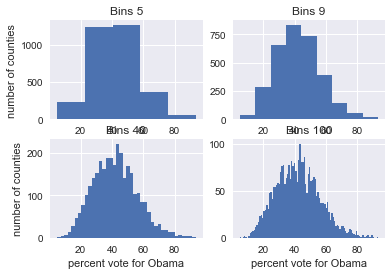

In [12]:
plt.subplot(2,2,1)
plt.hist(dataset['dem_share'], bins=5, histtype='stepfilled')
plt.title('Bins 5')
plt.ylabel('number of counties')


plt.subplot(2,2,2)
plt.hist(dataset['dem_share'], bins=9)
plt.title('Bins 9')

plt.subplot(2,2,3)
plt.hist(dataset['dem_share'], bins=40)
plt.title('Bins 40')
plt.xlabel('percent vote for Obama')
plt.ylabel('number of counties')

plt.subplot(2,2,4)
plt.hist(dataset['dem_share'], bins=100)
plt.xlabel('percent vote for Obama')
plt.title('Bins 100')

# Show the plot
plt.show()

This leads binning bias; you might interpret your plot differently for two different choices of bin number. And additional problem with histograms is that we are not plotting all of the data. We are sweeping the data into bins, and losing their actual values. 
To remedy these problemas we cam make a bee swarm plot, also called a swarm plot.
This is best shown by example:

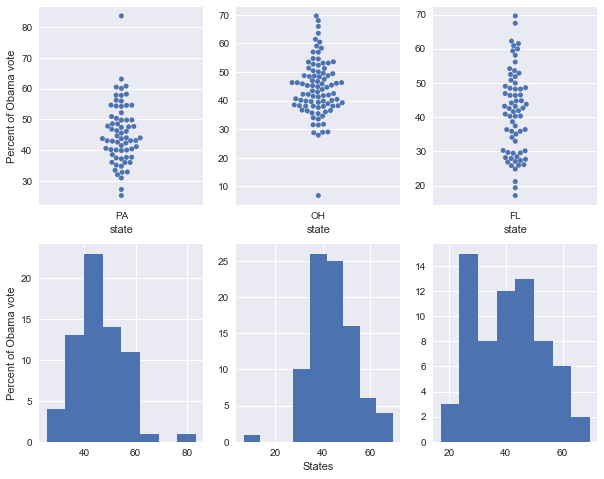

In [27]:
# selecting several states
PA = dataset[dataset['state'] == 'PA']
OH = dataset[dataset['state'] == 'OH']
FL = dataset[dataset['state'] == 'FL']

# Create a figure
plt.figure(figsize=(10,8))

# swarm plot
plt.subplot(2,3,1)
sns.swarmplot(x='state', y='dem_share', data=PA)
plt.ylabel("Percent of Obama vote")
plt.subplot(2,3,2)
sns.swarmplot(x='state', y='dem_share', data=OH)
plt.ylabel("")
plt.subplot(2,3,3)
sns.swarmplot(x='state', y='dem_share', data=FL)
plt.ylabel("")

# hist plot
plt.subplot(2,3,4)
plt.hist(PA['dem_share'], bins=n_bins(PA['dem_share']))
plt.ylabel("Percent of Obama vote")
plt.subplot(2,3,5)
plt.hist(OH['dem_share'], bins=n_bins(OH['dem_share']))
plt.xlabel("States")
plt.subplot(2,3,6)
plt.hist(FL['dem_share'], bins=n_bins(FL['dem_share']))


# Show the plot
plt.show()

Here is a bee swarm plot of the vote totals in the three swing states. Each point in the plot represents the share of the vote Obama got in a single county. The position along the y-axis is the quantitative information. The data are spread in x to make them visible, but their precisa location along the x-axis is unimportant.
Notably, we no longer have any binning bias and all data are displayed. 
A requirement is that your data are in a well-organized Pandas DataFrame where each column is a feature and each row an observation.
In this case, an observation is a county, and the features are state and the Democratic share of the vote.
To make the plot, you need to specify which column gives the values for the y-axis, in this case the share of the vote that went to the Democrat Barack Obama, and the values for the x-axis, in this case the state.

From this plot, too, we can clearly see that Obama got less than 50% of the vote in the majority of counties in each of the three swing states.

## Plotting all of your data: empirical cumulative distribution

The bee swarm plot has a limit to their efficacy. For example, image we wanted to plot the county-level voting data for all states east of the Mississippi River and all states west. We make the swarm plot as before, but using a DataFrame that contains all states, with each classified as being east or west of the Mississippi:

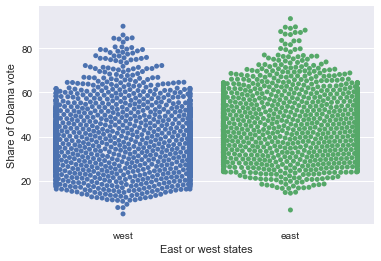

In [28]:
# swarmplot of west/est Mississippi
sns.swarmplot(x='east_west', y='dem_share', data=dataset)

# label the axes
plt.xlabel('East or west states')
plt.ylabel('Share of Obama vote')

# show the plot
plt.show()

Here, the bee swarm plot has a real problem. The edges have overlapping data points, which was necessary in order to fit all points onto the plot. We are now obfuscating data. So, using a bee swarm plot here is not the best option.
As an alternative, we can compute an empirical cumulative distribution function, or ECDF.

### Empirical cumulative distribution function (ECDF)

In [29]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange( 1, n + 1) / n

    return x, y

The x-axis is the sorted data and the y-axis is evenly spaced data poinst with a maximum of one, which we can generate using *np.arange* and then dividing by the total number of data points. Once we specify the x and y values, we plot the points.

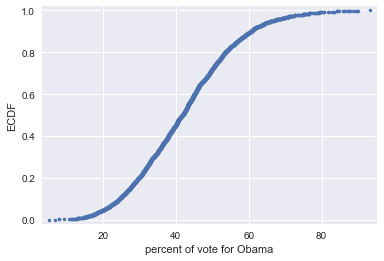

In [30]:
# apply ecdf function
x, y = ecdf(dataset['dem_share'])

# plot the result
plt.plot(x, y, marker='.', linestyle='none')

# label the axes
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')

# margins
plt.margins(0.02) # keeps data off plot edges

# show the plot
plt.show()

A x-value of an ECDF is the quantity you are measuring, in this case the percent of vote that sent to Obama. The y-value is the fraction of data points that have a value smaller than the correspoding x-value.

For exmaple, we can see that 20% of counties in swing states had 36% or less of its people vote for Obama.
Similarly, 75% of counties in swing states had 50% or less of its people vote for Obama.

### Multiple ECDFs plot
We can also easily plot multiple ECDFs on the same plot.

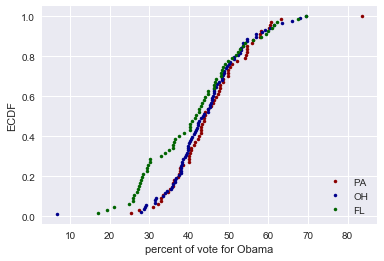

In [38]:
# We apply ecdf function to PA, OH and FL
x_pa, y_pa = ecdf(PA['dem_share']) # Pa democratic share of vote
x_oh, y_oh = ecdf(OH['dem_share']) # OH democratic share of vote
x_fl, y_fl = ecdf(FL['dem_share']) # FL democratic share of vote

# plot the results
plt.plot(x_pa, y_pa, marker='.', linestyle='none', color='darkred')
plt.plot(x_oh, y_oh, marker='.', linestyle='none', color='darkblue')
plt.plot(x_fl, y_fl, marker='.', linestyle='none', color='darkgreen')

# label the axes
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')

# show legend
plt.legend(('PA', 'OH', 'FL'), loc='lower right')

# show the plot
plt.show()

We see that Ohio and Pennsylvania were similar, with Pennsylvania having slightly more Democratic counties. Florida, on the other hand, had a greater fraction of heavily Republican counties.